In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
train = pd.read_csv('0513final_train_lite.csv')

In [4]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
train = shuffle(train)

In [5]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [6]:
new_all_feature = preprocessing.scale(train_feature)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add( tf.keras.layers.Dense(units=128, input_shape=[40],            #52,47
           kernel_initializer='he_normal',
           kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
           activation='relu') )

In [10]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 300

In [11]:
model.add(tf.keras.layers.Dense(units=64,
               kernel_initializer='he_normal',  #he_normal
               kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
               activation='relu'))   #relu

In [12]:
model.add(tf.keras.layers.Dropout(0.4))  #ep 100    #0.5  #0.3

In [13]:
model.add(tf.keras.layers.Dense(units=4, 
#                                kernel_initializer='normal',
                                activation='softmax'))    # kernel_initializer='normal',

In [14]:
adam = keras.optimizers.Adam( lr=0.001 ,beta_1=0.9, beta_2=0.999, epsilon=1e-08 )

In [15]:
model.compile( optimizer = adam , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
train_history = model.fit(new_all_feature , train_y, validation_split = 0.1,
                          epochs = 500, batch_size = 15, verbose=2)   #一層500  三層1500   #500比50好

Train on 171 samples, validate on 20 samples
Epoch 1/500
 - 0s - loss: 30.8322 - acc: 0.2749 - val_loss: 28.6783 - val_acc: 0.5000
Epoch 2/500
 - 0s - loss: 28.0017 - acc: 0.3801 - val_loss: 26.1411 - val_acc: 0.5500
Epoch 3/500
 - 0s - loss: 25.3972 - acc: 0.4444 - val_loss: 23.8551 - val_acc: 0.5500
Epoch 4/500
 - 0s - loss: 23.1921 - acc: 0.4620 - val_loss: 21.7589 - val_acc: 0.5500
Epoch 5/500
 - 0s - loss: 21.0834 - acc: 0.5088 - val_loss: 19.8489 - val_acc: 0.5500
Epoch 6/500
 - 0s - loss: 19.2300 - acc: 0.4912 - val_loss: 18.0891 - val_acc: 0.6000
Epoch 7/500
 - 0s - loss: 17.5036 - acc: 0.5497 - val_loss: 16.4703 - val_acc: 0.6000
Epoch 8/500
 - 0s - loss: 15.8650 - acc: 0.5731 - val_loss: 14.9953 - val_acc: 0.6500
Epoch 9/500
 - 0s - loss: 14.4649 - acc: 0.5146 - val_loss: 13.6591 - val_acc: 0.6500
Epoch 10/500
 - 0s - loss: 13.1327 - acc: 0.5556 - val_loss: 12.4266 - val_acc: 0.6500
Epoch 11/500
 - 0s - loss: 11.9212 - acc: 0.5789 - val_loss: 11.3099 - val_acc: 0.6500
Epoch 1

Epoch 97/500
 - 0s - loss: 1.0379 - acc: 0.6491 - val_loss: 1.2259 - val_acc: 0.6500
Epoch 98/500
 - 0s - loss: 1.0503 - acc: 0.6550 - val_loss: 1.2365 - val_acc: 0.6500
Epoch 99/500
 - 0s - loss: 1.0564 - acc: 0.6608 - val_loss: 1.2377 - val_acc: 0.7000
Epoch 100/500
 - 0s - loss: 1.0517 - acc: 0.6374 - val_loss: 1.2399 - val_acc: 0.7000
Epoch 101/500
 - 0s - loss: 1.0151 - acc: 0.6667 - val_loss: 1.2361 - val_acc: 0.7000
Epoch 102/500
 - 0s - loss: 1.0497 - acc: 0.6257 - val_loss: 1.2371 - val_acc: 0.7000
Epoch 103/500
 - 0s - loss: 1.0548 - acc: 0.6374 - val_loss: 1.2590 - val_acc: 0.7000
Epoch 104/500
 - 0s - loss: 1.0436 - acc: 0.6842 - val_loss: 1.2373 - val_acc: 0.6500
Epoch 105/500
 - 0s - loss: 1.0286 - acc: 0.6667 - val_loss: 1.2244 - val_acc: 0.7000
Epoch 106/500
 - 0s - loss: 1.0532 - acc: 0.6550 - val_loss: 1.2484 - val_acc: 0.6500
Epoch 107/500
 - 0s - loss: 1.0264 - acc: 0.6784 - val_loss: 1.2442 - val_acc: 0.6500
Epoch 108/500
 - 0s - loss: 1.0334 - acc: 0.6667 - val_lo

Epoch 193/500
 - 0s - loss: 0.9621 - acc: 0.7251 - val_loss: 1.3440 - val_acc: 0.6000
Epoch 194/500
 - 0s - loss: 0.9750 - acc: 0.6959 - val_loss: 1.3192 - val_acc: 0.7000
Epoch 195/500
 - 0s - loss: 0.9917 - acc: 0.7193 - val_loss: 1.3358 - val_acc: 0.7000
Epoch 196/500
 - 0s - loss: 0.9604 - acc: 0.7251 - val_loss: 1.3293 - val_acc: 0.6500
Epoch 197/500
 - 0s - loss: 0.9614 - acc: 0.6959 - val_loss: 1.3306 - val_acc: 0.6500
Epoch 198/500
 - 0s - loss: 0.9809 - acc: 0.7251 - val_loss: 1.3269 - val_acc: 0.7500
Epoch 199/500
 - 0s - loss: 0.9905 - acc: 0.6901 - val_loss: 1.3229 - val_acc: 0.7000
Epoch 200/500
 - 0s - loss: 0.9689 - acc: 0.7076 - val_loss: 1.3049 - val_acc: 0.7000
Epoch 201/500
 - 0s - loss: 0.9497 - acc: 0.7193 - val_loss: 1.3720 - val_acc: 0.5000
Epoch 202/500
 - 0s - loss: 0.9406 - acc: 0.7719 - val_loss: 1.3338 - val_acc: 0.6500
Epoch 203/500
 - 0s - loss: 0.9536 - acc: 0.7135 - val_loss: 1.3243 - val_acc: 0.7000
Epoch 204/500
 - 0s - loss: 0.9874 - acc: 0.6959 - val

Epoch 289/500
 - 0s - loss: 0.8594 - acc: 0.7661 - val_loss: 1.3963 - val_acc: 0.7000
Epoch 290/500
 - 0s - loss: 0.8402 - acc: 0.7836 - val_loss: 1.4460 - val_acc: 0.5000
Epoch 291/500
 - 0s - loss: 0.8728 - acc: 0.8246 - val_loss: 1.4719 - val_acc: 0.5500
Epoch 292/500
 - 0s - loss: 0.9234 - acc: 0.7427 - val_loss: 1.4102 - val_acc: 0.6000
Epoch 293/500
 - 0s - loss: 0.8821 - acc: 0.7485 - val_loss: 1.3905 - val_acc: 0.7000
Epoch 294/500
 - 0s - loss: 0.9098 - acc: 0.7485 - val_loss: 1.4200 - val_acc: 0.5500
Epoch 295/500
 - 0s - loss: 0.8930 - acc: 0.7719 - val_loss: 1.4082 - val_acc: 0.6500
Epoch 296/500
 - 0s - loss: 0.9065 - acc: 0.7602 - val_loss: 1.4149 - val_acc: 0.7000
Epoch 297/500
 - 0s - loss: 0.8693 - acc: 0.7778 - val_loss: 1.4653 - val_acc: 0.5000
Epoch 298/500
 - 0s - loss: 0.9181 - acc: 0.7485 - val_loss: 1.4621 - val_acc: 0.5500
Epoch 299/500
 - 0s - loss: 0.8528 - acc: 0.7602 - val_loss: 1.4378 - val_acc: 0.5500
Epoch 300/500
 - 0s - loss: 0.8755 - acc: 0.7895 - val

Epoch 385/500
 - 0s - loss: 0.8289 - acc: 0.7895 - val_loss: 1.4670 - val_acc: 0.5500
Epoch 386/500
 - 0s - loss: 0.8478 - acc: 0.8187 - val_loss: 1.4983 - val_acc: 0.3500
Epoch 387/500
 - 0s - loss: 0.8653 - acc: 0.7544 - val_loss: 1.4767 - val_acc: 0.5000
Epoch 388/500
 - 0s - loss: 0.8149 - acc: 0.7661 - val_loss: 1.5019 - val_acc: 0.5000
Epoch 389/500
 - 0s - loss: 0.8332 - acc: 0.7836 - val_loss: 1.4883 - val_acc: 0.5000
Epoch 390/500
 - 0s - loss: 0.8167 - acc: 0.8187 - val_loss: 1.5246 - val_acc: 0.4500
Epoch 391/500
 - 0s - loss: 0.8152 - acc: 0.8538 - val_loss: 1.4790 - val_acc: 0.4000
Epoch 392/500
 - 0s - loss: 0.8308 - acc: 0.8012 - val_loss: 1.4302 - val_acc: 0.5500
Epoch 393/500
 - 0s - loss: 0.8422 - acc: 0.7485 - val_loss: 1.5512 - val_acc: 0.4500
Epoch 394/500
 - 0s - loss: 0.8215 - acc: 0.8304 - val_loss: 1.4790 - val_acc: 0.4500
Epoch 395/500
 - 0s - loss: 0.8256 - acc: 0.8246 - val_loss: 1.4050 - val_acc: 0.5500
Epoch 396/500
 - 0s - loss: 0.7890 - acc: 0.8012 - val

Epoch 481/500
 - 0s - loss: 0.7684 - acc: 0.8246 - val_loss: 1.5263 - val_acc: 0.4500
Epoch 482/500
 - 0s - loss: 0.7485 - acc: 0.8655 - val_loss: 1.5448 - val_acc: 0.4500
Epoch 483/500
 - 0s - loss: 0.7663 - acc: 0.8480 - val_loss: 1.4711 - val_acc: 0.5500
Epoch 484/500
 - 0s - loss: 0.7471 - acc: 0.8363 - val_loss: 1.4780 - val_acc: 0.5500
Epoch 485/500
 - 0s - loss: 0.7562 - acc: 0.8187 - val_loss: 1.5132 - val_acc: 0.5500
Epoch 486/500
 - 0s - loss: 0.7718 - acc: 0.8012 - val_loss: 1.5289 - val_acc: 0.4500
Epoch 487/500
 - 0s - loss: 0.7653 - acc: 0.8538 - val_loss: 1.5192 - val_acc: 0.4500
Epoch 488/500
 - 0s - loss: 0.7270 - acc: 0.8480 - val_loss: 1.4999 - val_acc: 0.4500
Epoch 489/500
 - 0s - loss: 0.7621 - acc: 0.8421 - val_loss: 1.5026 - val_acc: 0.4500
Epoch 490/500
 - 0s - loss: 0.7856 - acc: 0.8187 - val_loss: 1.4899 - val_acc: 0.5000
Epoch 491/500
 - 0s - loss: 0.7644 - acc: 0.8304 - val_loss: 1.4781 - val_acc: 0.5500
Epoch 492/500
 - 0s - loss: 0.7597 - acc: 0.8304 - val

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

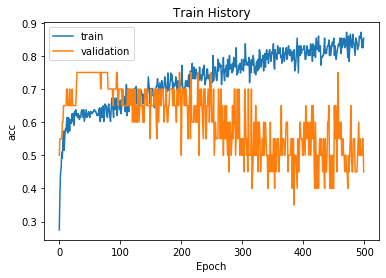

In [18]:
show_train_history(train_history,'acc','val_acc')

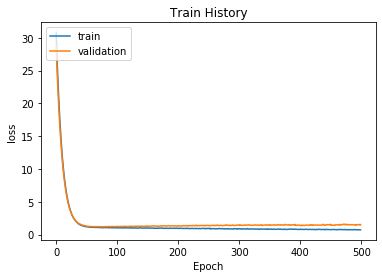

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
#from keras.models import load_model
#model.save('model0513_V.h5')

In [21]:
#import tensorflowjs as tfjs

In [22]:
#tfjs.converters.save_keras_model(model,'./model_file')

In [23]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)        #tf.lite這個要 tensorflow2.0才能裝 
#tflite_model = converter.convert()
#open("ann.tflite" , "wb").write(tflite_model)

In [24]:
test = pd.read_csv('0527test_data_final_real.csv')

In [25]:
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [26]:
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [27]:
test_scaledFeatures  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [28]:
test_out =  model.predict(test_scaledFeatures)

In [29]:
test_out

array([[0.16833442, 0.34780785, 0.36926618, 0.11459152],
       [0.26604223, 0.49409997, 0.18379995, 0.0560579 ],
       [0.6380204 , 0.34370407, 0.01290497, 0.00537053],
       [0.9093137 , 0.05524512, 0.01807221, 0.01736898],
       [0.36822435, 0.10871214, 0.3133903 , 0.20967321],
       [0.17802908, 0.4815765 , 0.2648638 , 0.0755307 ],
       [0.8150368 , 0.14731778, 0.02264455, 0.01500085],
       [0.848875  , 0.05846298, 0.04665361, 0.04600843]], dtype=float32)

In [30]:
test_out_class =  model.predict_classes(test_scaledFeatures)

In [31]:
test_out_class

array([2, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [32]:
test['HOSDAY'].values

array([1, 1, 0, 1, 0, 1, 1, 0])

In [33]:
pd.crosstab( test['HOSDAY'].values, test_out_class, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,3,0,0
1,2,2,1


In [ ]:
precision, recall, fscore, support = score( test['HOSDAY'].values, test_out_class)

In [ ]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [34]:
score2 = model.evaluate(test_scaledFeatures, test_y, verbose=2)
score2

[1.413271427154541, 0.625]